## Investigate potential use of Chicago Rideshare dataset for Capstone 1

In [168]:
%config IPCompleter.greedy=True


In [3]:
import csv
import os
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import plotly.graph_objects as go
import geopandas as gpd
import seaborn as sns

### Import subset of data for inspection

In [6]:
datadir=r'/Users/rtaylor/Desktop/Springboard/DataSets/Rideshare'
testdf=pd.read_csv(os.path.join(datadir,'Transportation_Network_Providers_-_Trips.csv'),nrows=10000,parse_dates=['Trip Start Timestamp','Trip End Timestamp'])
testdf=testdf.dropna(how='any')

In [195]:
print(testdf.dtypes)
print(testdf.info())
testdf.head()

Trip ID                               object
Trip Start Timestamp          datetime64[ns]
Trip End Timestamp            datetime64[ns]
Trip Seconds                         float64
Trip Miles                           float64
Pickup Census Tract                  float64
Dropoff Census Tract                 float64
Pickup Community Area                float64
Dropoff Community Area               float64
Fare                                 float64
Tip                                    int64
Additional Charges                   float64
Trip Total                           float64
Shared Trip Authorized                  bool
Trips Pooled                           int64
Pickup Centroid Latitude             float64
Pickup Centroid Longitude            float64
Pickup Centroid Location              object
Dropoff Centroid Latitude            float64
Dropoff Centroid Longitude           float64
Dropoff Centroid Location             object
dtype: object
<class 'pandas.core.frame.DataFrame'>
Int

,Trip ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,...,Additional Charges,Trip Total,Shared Trip Authorized,Trips Pooled,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
1,b4154b348df31392f5df63c5ef8ebf3b2dd839f1,2018-12-15 06:45:00,2018-12-15 07:00:00,928.0,9.0,1.703133e+10,1.703183e+10,33.0,21.0,12.5,...,2.5,15.0,False,1,41.859350,-87.617358,POINT (-87.6173580061 41.859349715),41.942859,-87.717504,POINT (-87.717503858 41.942859303)
2,b4154bd8a97e75b348230c92eebaf4d1f4798e34,2018-12-07 01:00:00,2018-12-07 01:15:00,680.0,4.4,1.703107e+10,1.703108e+10,7.0,8.0,7.5,...,2.5,11.0,False,1,41.928763,-87.665677,POINT (-87.665676837 41.9287630064),41.892042,-87.631864,POINT (-87.6318639497 41.8920421365)
3,b4154f9ac92062155aae2a04cba41ff11fd07478,2018-11-04 12:30:00,2018-11-04 12:45:00,285.0,0.7,1.703108e+10,1.703108e+10,8.0,8.0,7.5,...,2.8,10.3,False,1,41.890922,-87.618868,POINT (-87.6188683546 41.8909220259),41.892042,-87.631864,POINT (-87.6318639497 41.8920421365)
5,b41555c9be5ea23faef78395ccbb152c13d6f864,2018-11-18 21:15:00,2018-11-18 21:30:00,642.0,2.0,1.703133e+10,1.703184e+10,33.0,32.0,7.5,...,2.5,10.0,False,1,41.859350,-87.617358,POINT (-87.6173580061 41.859349715),41.880994,-87.632746,POINT (-87.6327464887 41.8809944707)
6,b4155715e294bff63497ba5de5e2f43304b90c49,2018-12-16 14:15:00,2018-12-16 14:30:00,1571.0,13.4,1.703132e+10,1.703198e+10,32.0,56.0,20.0,...,7.5,27.5,False,1,41.884987,-87.620993,POINT (-87.6209929134 41.8849871918),41.785999,-87.750934,POINT (-87.7509342894 41.785998518)


In [172]:
 testdf[['Trip Miles','Fare','Tip','Additional Charges','Trip Total']].head()

,Trip Miles,Fare,Tip,Additional Charges,Trip Total
0,11.3,10.0,0,7.5,17.5
1,9.0,12.5,0,2.5,15.0
2,4.4,7.5,1,2.5,11.0
3,0.7,7.5,0,2.8,10.3
4,9.0,5.0,0,2.5,7.5


In [174]:
(testdf['Trip Start Timestamp'].min(),testdf['Trip Start Timestamp'].max())

('11/01/2018 01:00:00 PM', '12/31/2018 04:00:00 PM')

In [175]:
testdf['Pickup Community Area'].unique()

array([23., 33.,  7.,  8., 31., 32., 77., nan,  6., 28.,  1., 24., 25.,
       67., 34., 76., 10., 48., 22., 63., 56., 13., 41., 43., 29.,  4.,
       11., 60., 16., 30., 68., 42.,  5.,  2., 38., 21., 35., 15., 49.,
       26., 14., 65., 27., 19., 58., 66., 20., 17., 39., 59., 62.,  3.,
       44., 73., 57., 46., 61., 71., 51.,  9., 75., 72., 70., 69., 40.,
       45., 50., 47., 64., 12., 54., 36., 74., 18., 37., 55.])

In [176]:
testdf.columns


Index(['Trip ID', 'Trip Start Timestamp', 'Trip End Timestamp', 'Trip Seconds',
       'Trip Miles', 'Pickup Census Tract', 'Dropoff Census Tract',
       'Pickup Community Area', 'Dropoff Community Area', 'Fare', 'Tip',
       'Additional Charges', 'Trip Total', 'Shared Trip Authorized',
       'Trips Pooled', 'Pickup Centroid Latitude', 'Pickup Centroid Longitude',
       'Pickup Centroid Location', 'Dropoff Centroid Latitude',
       'Dropoff Centroid Longitude', 'Dropoff Centroid Location'],
      dtype='object')

In [218]:
iterdf=pd.read_csv(os.path.join(datadir,'Transportation_Network_Providers_-_Trips.csv'),chunksize=200000)
#dataset has 40 million records

In [219]:
firstrun=False
if firstrun:%%time
    samp_df=pd.DataFrame()
    #sample 1% of df and make new df
    for chunk in iterdf:
        #df=chunk.reset_index()
        #df=df.dropna(how='any')
        samp_df=samp_df.append(chunk.sample(frac=0.01))#=df.sample(frac=0.1)
    
    

CPU times: user 8min 29s, sys: 43.4 s, total: 9min 13s
Wall time: 7min 56s


In [220]:
samp_df=samp_df.dropna(how='any')
samp_df.columns = ['TripID', 'TripStart', 'TripEnd', 'TripSeconds',
       'TripMiles', 'PUCensusTract', 'DOCensusTract',
       'PUCommunityArea', 'DOCommunityArea', 'Fare', 'Tip',
       'AdditionalCharges', 'TripTotal', 'SharedTripAuth',
       'TripsPooled', 'PU_Lat', 'PU_Long',
       'PU_Geo', 'DO_Lat',
       'DO_Long', 'DO_Geo']
samp_df['TripStart']=pd.to_datetime(samp_df['TripStart'],infer_datetime_format=True)
samp_df['TripEnd']=pd.to_datetime(samp_df['TripEnd'],infer_datetime_format=True)
samp_df.head()

,TripID,TripStart,TripEnd,TripSeconds,TripMiles,PUCensusTract,DOCensusTract,PUCommunityArea,DOCommunityArea,Fare,...,AdditionalCharges,TripTotal,SharedTripAuth,TripsPooled,PU_Lat,PU_Long,PU_Geo,DO_Lat,DO_Long,DO_Geo
11555,b46758240c543a357569323e0cd58314c781e6c0,2018-12-14 09:45:00,2018-12-14 10:15:00,1833.0,17.1,1.703175e+10,1.703183e+10,75.0,28.0,25.0,...,2.5,27.5,False,1,41.695834,-87.652031,POINT (-87.652031202 41.6958343746),41.885281,-87.657233,POINT (-87.6572331997 41.8852813201)
174078,b8f5bc1793ded809c6bb80770ebaaef9cc18bece,2018-12-03 12:45:00,2018-12-03 13:00:00,501.0,2.1,1.703124e+10,1.703183e+10,24.0,28.0,5.0,...,2.5,8.5,True,1,41.892355,-87.674507,POINT (-87.674506788 41.8923550478),41.879067,-87.657005,POINT (-87.657005027 41.8790669938)
150566,b84d6aef12360c1e0cb895eb589a3954c25459a5,2018-11-18 02:45:00,2018-11-18 03:00:00,180.0,0.0,1.703183e+10,1.703183e+10,6.0,6.0,2.5,...,2.5,5.0,False,1,41.946295,-87.654298,POINT (-87.6542980837 41.9462945357),41.946295,-87.654298,POINT (-87.6542980837 41.9462945357)
164862,b8b396b7b6c92998329dcc3613b095cce52f968a,2018-12-01 01:15:00,2018-12-01 01:30:00,530.0,2.5,1.703124e+10,1.703105e+10,24.0,5.0,7.5,...,2.5,10.0,False,1,41.906026,-87.675312,POINT (-87.6753116216 41.906025969),41.941312,-87.685616,POINT (-87.6856158172 41.9413116172)
169883,b8d73a5b2ec392bbd2ee648ea363cd74e8d797ab,2018-11-28 14:00:00,2018-11-28 14:30:00,1339.0,5.9,1.703108e+10,1.703122e+10,8.0,22.0,12.5,...,2.5,15.0,False,1,41.898332,-87.620763,POINT (-87.6207628651 41.8983317935),41.928391,-87.704907,POINT (-87.7049072355 41.9283913974)


In [221]:
#this took a long time, saving output
samp_df.to_pickle(os.path.join(datadir,'chicago_pickle'))

In [223]:
samp_df.head()

,TripID,TripStart,TripEnd,TripSeconds,TripMiles,PUCensusTract,DOCensusTract,PUCommunityArea,DOCommunityArea,Fare,...,AdditionalCharges,TripTotal,SharedTripAuth,TripsPooled,PU_Lat,PU_Long,PU_Geo,DO_Lat,DO_Long,DO_Geo
11555,b46758240c543a357569323e0cd58314c781e6c0,2018-12-14 09:45:00,2018-12-14 10:15:00,1833.0,17.1,1.703175e+10,1.703183e+10,75.0,28.0,25.0,...,2.5,27.5,False,1,41.695834,-87.652031,POINT (-87.652031202 41.6958343746),41.885281,-87.657233,POINT (-87.6572331997 41.8852813201)
174078,b8f5bc1793ded809c6bb80770ebaaef9cc18bece,2018-12-03 12:45:00,2018-12-03 13:00:00,501.0,2.1,1.703124e+10,1.703183e+10,24.0,28.0,5.0,...,2.5,8.5,True,1,41.892355,-87.674507,POINT (-87.674506788 41.8923550478),41.879067,-87.657005,POINT (-87.657005027 41.8790669938)
150566,b84d6aef12360c1e0cb895eb589a3954c25459a5,2018-11-18 02:45:00,2018-11-18 03:00:00,180.0,0.0,1.703183e+10,1.703183e+10,6.0,6.0,2.5,...,2.5,5.0,False,1,41.946295,-87.654298,POINT (-87.6542980837 41.9462945357),41.946295,-87.654298,POINT (-87.6542980837 41.9462945357)
164862,b8b396b7b6c92998329dcc3613b095cce52f968a,2018-12-01 01:15:00,2018-12-01 01:30:00,530.0,2.5,1.703124e+10,1.703105e+10,24.0,5.0,7.5,...,2.5,10.0,False,1,41.906026,-87.675312,POINT (-87.6753116216 41.906025969),41.941312,-87.685616,POINT (-87.6856158172 41.9413116172)
169883,b8d73a5b2ec392bbd2ee648ea363cd74e8d797ab,2018-11-28 14:00:00,2018-11-28 14:30:00,1339.0,5.9,1.703108e+10,1.703122e+10,8.0,22.0,12.5,...,2.5,15.0,False,1,41.898332,-87.620763,POINT (-87.6207628651 41.8983317935),41.928391,-87.704907,POINT (-87.7049072355 41.9283913974)


In [234]:
print(samp_df.TripStart.min(),samp_df.TripStart.max())
mdf=samp_df.groupby(samp_df.TripStart.dt.to_period("M")).size()


2018-11-01 00:00:00 2019-03-31 23:45:00


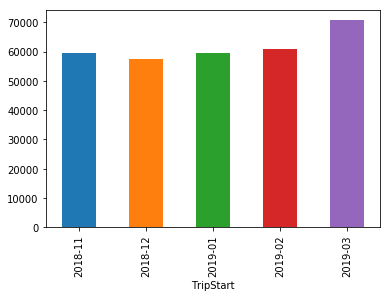

In [235]:
mdf.plot(kind='bar')

In [268]:
#Try to plot hourly utilization by weekday
plt.rcParams['figure.figsize'] = [15, 5]
ddf=samp_df.loc[(samp_df.TripStart>'20181201')&(samp_df.TripStart<'20181221')]#before christmas holiday
ddf.index=ddf.TripStart
ddf=ddf.sort_index()
ddf['Hour']=ddf.index.hour
ddf['DOW']=ddf.index.dayofweek
hdf=ddf.groupby(['DOW','Hour']).size()
hdf=hdf.unstack()
hdf.index=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
hdf

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Monday,74,25,11,5,22,59,172,286,387,346,...,178,220,261,388,444,328,273,226,169,98
Tuesday,47,16,7,2,12,50,123,311,421,307,...,187,219,301,404,438,387,304,275,245,154
Wednesday,69,28,12,5,14,54,153,313,404,312,...,214,223,307,470,477,439,351,321,314,174
Thursday,111,40,11,14,17,47,135,325,411,328,...,216,276,338,506,601,580,428,450,427,324
Friday,145,70,34,9,13,35,107,214,282,213,...,194,246,308,381,493,500,422,383,409,367
Saturday,449,365,240,94,38,29,43,92,165,252,...,389,435,473,572,713,710,630,564,607,624
Sunday,588,428,313,147,63,41,42,69,80,159,...,275,327,371,368,361,292,239,222,197,133


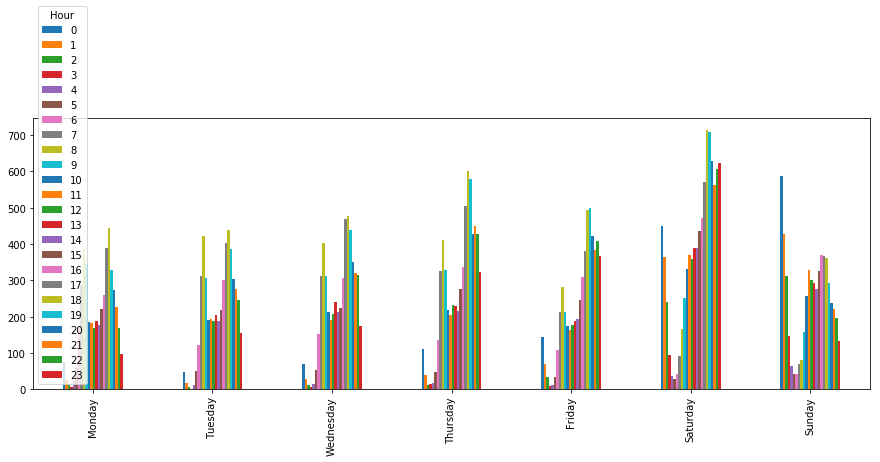

In [269]:
#Barchart is sortof useful
hdf.plot(kind='bar')

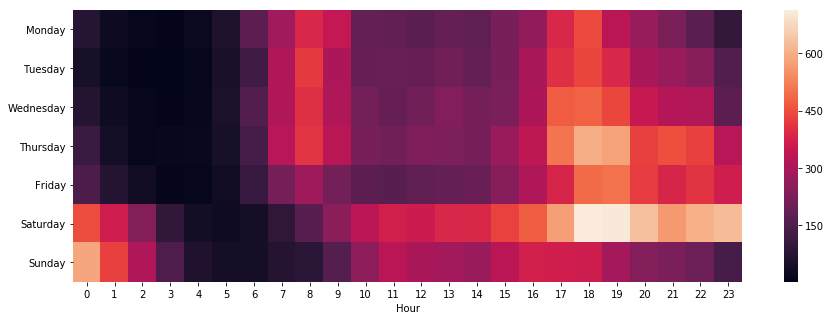

In [270]:
#heatmap is more useful
import seaborn as sns

sns.heatmap(hdf)

### Look at the driver datasets

In [16]:
drivers=pd.read_csv(os.path.join(datadir,'Transportation_Network_Providers_-_Drivers.csv'))

/Users/rtaylor/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning:

Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.



In [17]:
drivers.columns

Index(['MONTH_REPORTED', 'DRIVER_START_MONTH', 'CITY', 'STATE', 'ZIP',
       'NUMBER_OF_TRIPS', 'MULTIPLE_TNPS'],
      dtype='object')

In [18]:
drivers.head()

,MONTH_REPORTED,DRIVER_START_MONTH,CITY,STATE,ZIP,NUMBER_OF_TRIPS,MULTIPLE_TNPS
0,2016-08,2015-12,Aurora,IL,60505,342.0,False
1,2018-01,2017-02,Chicago,IL,60612,391.0,True
2,2018-01,2015-03,Dolton,IL,60419,371.0,True
3,2017-09,2017-07,Eilmette,IL,60091,251.0,False
4,2018-06,2018-02,Chicago,IL,60606,332.0,False


In [19]:
vehic=pd.read_csv(os.path.join(datadir,'Transportation_Network_Providers_-_Vehicles.csv'))

In [21]:
vehic.head()
vehic.shape

(5176624, 9)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x124e042b0>,
      dtype=object)

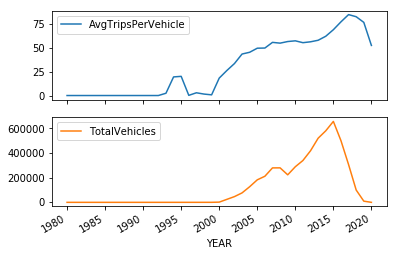

In [105]:
vehic=vehic.loc[(vehic.YEAR>1979)&(vehic.YEAR<2021)]
use_by_year=vehic.groupby('YEAR')['NUMBER_OF_TRIPS'].agg(['mean','size'])
use_by_year.columns=['AvgTripsPerVehicle','TotalVehicles']
use_by_year.plot(subplots=True)

### Back to rides

In [24]:
#cleanup column names
testdf.columns = ['TripID', 'TripStart', 'TripEnd', 'TripSeconds',
       'TripMiles', 'PUCensusTract', 'DOCensusTract',
       'PUCommunityArea', 'DOCommunityArea', 'Fare', 'Tip',
       'AdditionalCharges', 'TripTotal', 'SharedTripAuth',
       'TripsPooled', 'PU_Lat', 'PU_Long',
       'PU_Geo', 'DO_Lat',
       'DO_Long', 'DO_Geo']


In [25]:
samp_df.head()

,TripID,TripStart,TripEnd,TripSeconds,TripMiles,PUCensusTract,DOCensusTract,PUCommunityArea,DOCommunityArea,Fare,...,AdditionalCharges,TripTotal,SharedTripAuth,TripsPooled,PU_Lat,PU_Long,PU_Geo,DO_Lat,DO_Long,DO_Geo
0,b4154abebae4eedc5a23efd203bcb3e819c1f79e,12/30/2018 06:30:00 AM,12/30/2018 07:00:00 AM,1691.0,11.3,NaN,NaN,23.0,33.0,10.0,...,7.5,17.5,True,4,41.900070,-87.720918,POINT (-87.7209182385 41.9000696026),41.857184,-87.620335,POINT (-87.6203346241 41.8571838585)
1,b4154b348df31392f5df63c5ef8ebf3b2dd839f1,12/15/2018 06:45:00 AM,12/15/2018 07:00:00 AM,928.0,9.0,1.703133e+10,1.703183e+10,33.0,21.0,12.5,...,2.5,15.0,False,1,41.859350,-87.617358,POINT (-87.6173580061 41.859349715),41.942859,-87.717504,POINT (-87.717503858 41.942859303)
2,b4154bd8a97e75b348230c92eebaf4d1f4798e34,12/07/2018 01:00:00 AM,12/07/2018 01:15:00 AM,680.0,4.4,1.703107e+10,1.703108e+10,7.0,8.0,7.5,...,2.5,11.0,False,1,41.928763,-87.665677,POINT (-87.665676837 41.9287630064),41.892042,-87.631864,POINT (-87.6318639497 41.8920421365)
3,b4154f9ac92062155aae2a04cba41ff11fd07478,11/04/2018 12:30:00 PM,11/04/2018 12:45:00 PM,285.0,0.7,1.703108e+10,1.703108e+10,8.0,8.0,7.5,...,2.8,10.3,False,1,41.890922,-87.618868,POINT (-87.6188683546 41.8909220259),41.892042,-87.631864,POINT (-87.6318639497 41.8920421365)
4,b41553dc7bec43614e395bcda6cbdb00d76aca54,11/24/2018 11:00:00 AM,11/24/2018 11:30:00 AM,1607.0,9.0,NaN,NaN,31.0,23.0,5.0,...,2.5,7.5,True,3,41.850266,-87.667569,POINT (-87.667569312 41.8502663663),41.900070,-87.720918,POINT (-87.7209182385 41.9000696026)


### Attempt to view data in plotly

In [27]:
import plotly.graph_objects as go

In [46]:
data=testdf['PUCommunityArea'].value_counts()
data=data.iloc[:20]
data

8.0     2076
32.0    1124
28.0    1029
6.0      660
7.0      633
24.0     561
76.0     345
22.0     306
33.0     191
3.0      143
56.0     132
31.0     107
5.0       91
41.0      90
77.0      87
35.0      80
25.0      72
4.0       72
1.0       72
21.0      67
Name: PUCommunityArea, dtype: int64

In [47]:
fig=go.Figure(data=go.Bar(x=data.index,y=data.values))
fig.show()

### Try mapping

In [54]:

gdf=testdf.groupby('PU_Geo')['TripTotal','TripMiles'].mean().reset_index()
gdf.head()

,PU_Geo,TripTotal,TripMiles
0,POINT (-87.5409355129 41.6636706517),10.370000,3.800000
1,POINT (-87.551428197 41.7412427285),12.323158,5.678947
2,POINT (-87.551994147 41.7559614313),12.592500,6.375000
3,POINT (-87.5590602859 41.727560391),20.000000,10.800000
4,POINT (-87.5601889949 41.7535307093),52.500000,29.200000


In [58]:
import geopandas as gpd
from shapely import wkt

gdf['PU_Geo'] = gdf['PU_Geo'].apply(wkt.loads)
gdf = gpd.GeoDataFrame(gdf, geometry='PU_Geo')

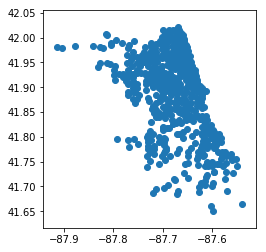

In [60]:
gdf.plot()

In [68]:
pdf=testdf.groupby(['PU_Lat','PU_Long'])['TripTotal','TripMiles'].mean().reset_index()
pdf.head()

,PU_Lat,PU_Long,TripTotal,TripMiles
0,41.650222,-87.599463,12.50,10.5
1,41.660136,-87.602848,5.00,1.9
2,41.663671,-87.540936,10.37,3.8
3,41.684615,-87.671250,7.50,2.8
4,41.687239,-87.719313,10.00,3.0


In [85]:
ycenter=(testdf.PU_Lat.min()+testdf.PU_Lat.max())/2
xcenter=(testdf.PU_Long.min()+testdf.PU_Long.max())/2

In [100]:
fig = go.Figure(
    data=go.Scattergeo(
        lon = pdf['PU_Long'],
        lat = pdf['PU_Lat'],
        mode = 'markers',
        marker_size = pdf['TripTotal']
        ),
    layout = go.Layout(
    autosize=True,
    hovermode='closest',
    title = go.layout.Title(
        text = 'Usage'
    ),
    geo = go.layout.Geo(
        #scope = 'north america',
        projection = go.layout.geo.Projection(
            #type = 'azimuthal equal area',
            scale=120),
        center={'lat': ycenter, 'lon': xcenter},

    ))
)
    
fig.show()

In [7]:
censtracts=gpd.read_file(os.path.join(datadir,'Boundaries - Census Blocks - 2010','geo_export_112f5653-9c3c-40d8-b280-058717fbd72f.shp')
                        )

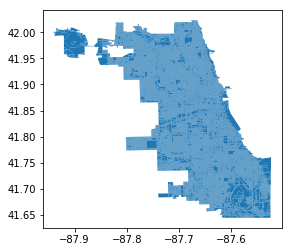

In [8]:
censtracts.plot()

In [9]:
censtracts.head()
#censtracts.dtypes

,blockce10,countyfp10,geoid10,name10,statefp10,tract_bloc,tractce10,geometry
0,2010,031,170316903002010,Block 2010,17,6903002010,690300,POLYGON ((-87.62906799941059 41.76908600007152...
1,3007,031,170316809003007,Block 3007,17,6809003007,680900,"POLYGON ((-87.6341179992764 41.77446599958471,..."
2,3013,031,170316809003013,Block 3013,17,6809003013,680900,POLYGON ((-87.63485400018324 41.77263300022619...
3,4019,031,170312909004019,Block 4019,17,2909004019,290900,POLYGON ((-87.73841099998789 41.85913100037079...
4,4016,031,170312925004016,Block 4016,17,2925004016,292500,POLYGON ((-87.73217300001724 41.85476400046529...


In [10]:
#testdf.groupby('PUCensusTract')['TripID'].count()
testdf.PUCensusTract.apply(lambda x: '{:0.0f}'.format(x))

AttributeError: 'DataFrame' object has no attribute 'PUCensusTract'

In [11]:
censtracts['blgrp']=censtracts.geoid10.str[0:11]
censtracts.head()

,blockce10,countyfp10,geoid10,name10,statefp10,tract_bloc,tractce10,geometry,blgrp
0,2010,031,170316903002010,Block 2010,17,6903002010,690300,POLYGON ((-87.62906799941059 41.76908600007152...,17031690300
1,3007,031,170316809003007,Block 3007,17,6809003007,680900,"POLYGON ((-87.6341179992764 41.77446599958471,...",17031680900
2,3013,031,170316809003013,Block 3013,17,6809003013,680900,POLYGON ((-87.63485400018324 41.77263300022619...,17031680900
3,4019,031,170312909004019,Block 4019,17,2909004019,290900,POLYGON ((-87.73841099998789 41.85913100037079...,17031290900
4,4016,031,170312925004016,Block 4016,17,2925004016,292500,POLYGON ((-87.73217300001724 41.85476400046529...,17031292500


In [19]:
blgrp=censtracts.dissolve(by='blgrp')

In [21]:
blgrp.to_file("Chicago_BlockGroups.shp")

In [25]:
btest=gpd.read_file("Chicago_BlockGroups.shp")

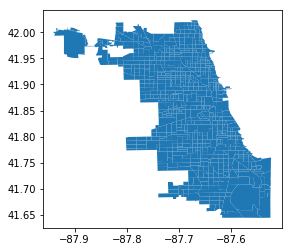

In [26]:
btest.plot()